**Hardware information**

In [4]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes

**Disk information**

In [5]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         226G   37G  189G  17% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.1G  910M  54% /sbin/docker-init
tmpfs           6.4G   28K  6.4G   1% /var/colab
/dev/sda1       233G   38G  195G  17% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


**Memory information**

In [6]:
!cat /proc/meminfo

MemTotal:       13297228 kB
MemFree:        10085536 kB
MemAvailable:   11861464 kB
Buffers:           85040 kB
Cached:          1781128 kB
SwapCached:            0 kB
Active:           603368 kB
Inactive:        2419860 kB
Active(anon):        924 kB
Inactive(anon):  1046224 kB
Active(file):     602444 kB
Inactive(file):  1373636 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               212 kB
Writeback:             0 kB
AnonPages:       1157104 kB
Mapped:           472224 kB
Shmem:              1256 kB
KReclaimable:      82600 kB
Slab:             113324 kB
SReclaimable:      82600 kB
SUnreclaim:        30724 kB
KernelStack:        4448 kB
PageTables:        23544 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648612 kB
Committed_AS:    3214732 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        9284 kB
VmallocChunk:          0 kB
Percpu:          

**Import libraries for dataframe handle and for visualizing data with matplotlib**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
from google.colab import files
uploaded = files.upload()

Saving comprar_alquilar.csv to comprar_alquilar (1).csv


In [11]:
dataframe = pd.read_csv(r"comprar_alquilar.csv")
dataframe.head(10)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


**Estimated distributions**

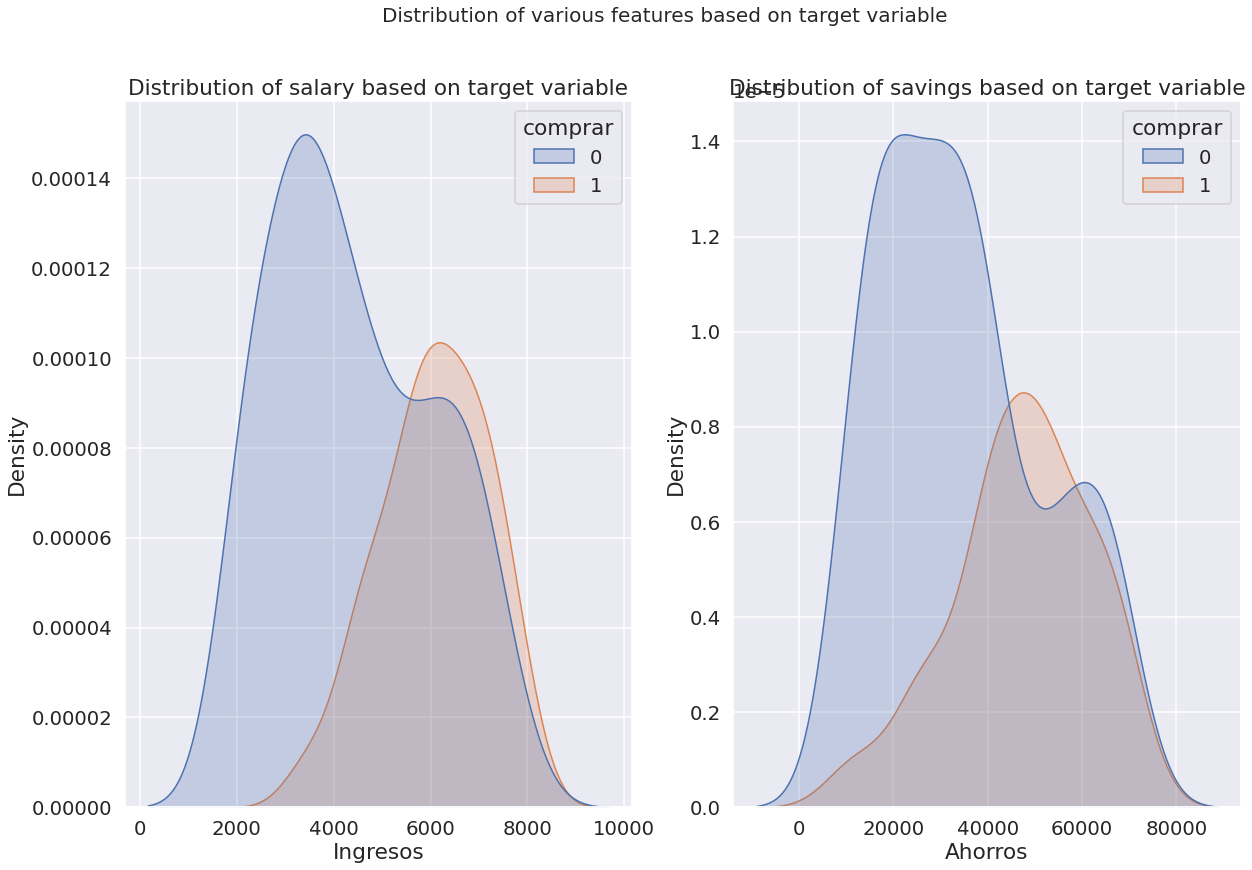

In [32]:
import seaborn as sns
sns.set()

sns.set_context('talk', font_scale= 1.2)
fig, ax = plt.subplots(1, 2, figsize = (20, 13))

plt.suptitle('Distribution of various features based on target variable', fontsize = 20)

ax1 = sns.kdeplot(x ='ingresos', data= dataframe, hue= 'comprar', shade= True, ax= ax[0]) #palette="crest")
ax1.set(xlabel = 'Ingresos', title= 'Distribution of salary based on target variable')

ax2 = sns.kdeplot(x ='ahorros', data= dataframe, hue= 'comprar', shade= True, ax= ax[1])
ax2.set(xlabel = 'Ahorros', title= 'Distribution of savings based on target variable')

plt.show()

**Histogram of characteristics avoidinf the column of results (buy)**


comprar
0    135
1     67
dtype: int64


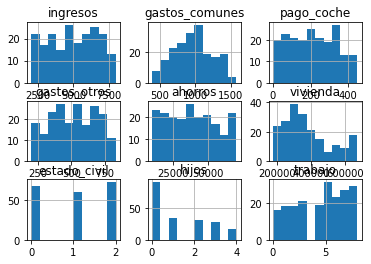

In [14]:
print(dataframe.groupby('comprar').size())
dataframe.drop(['comprar'], axis=1).hist()
plt.show()

**Preparation of entry data**

For this task it is necessary to process some columns, for example, by grouping the diverse bills. Then finance column is created which will be the result of house price minus family savings.

In [15]:
dataframe['gastos']=(dataframe['gastos_comunes']+dataframe['gastos_otros']+dataframe['pago_coche'])
dataframe['financiar']=dataframe['vivienda']-dataframe['ahorros']
dataframe.drop(['gastos_comunes','gastos_otros','pago_coche'], axis=1).head(10)

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
0,6000,50000,400000,0,2,2,1,1600,350000
1,6745,43240,636897,1,3,6,0,1496,593657
2,6455,57463,321779,2,1,8,1,1926,264316
3,7098,54506,660933,0,0,3,0,1547,606427
4,6167,41512,348932,0,0,3,1,1606,307420
5,5692,50875,360863,1,4,5,1,1247,309988
6,6830,46761,429812,1,1,5,1,1952,383051
7,6470,57439,606291,0,0,1,0,1856,548852
8,6251,50503,291010,0,0,3,1,2030,240507
9,6987,40611,324098,2,1,7,1,1755,283487


**Statistical resume with pandas describe()**

In [18]:
reduced = dataframe.drop(['gastos_comunes','gastos_otros','pago_coche'], axis=1)
reduced.describe()

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683,1698.752475,334599.970297
std,1682.862556,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988,324.838005,126607.099497
min,2008.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000,1007.000000,154716.000000
25%,3513.750000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000,1430.500000,240410.250000
50%,4947.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000,1669.500000,301177.000000
75%,6374.500000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000,1928.000000,393413.000000
max,7984.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000,2543.000000,618621.000000


**Import of basic libraries**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

**Select 5 best characteristics of data from columns in place of selecting all**

In [20]:

X=dataframe.drop(['comprar'], axis=1)
y=dataframe['comprar']
 
best=SelectKBest(k=5)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar'], dtype='object')


**See correlation approximation**

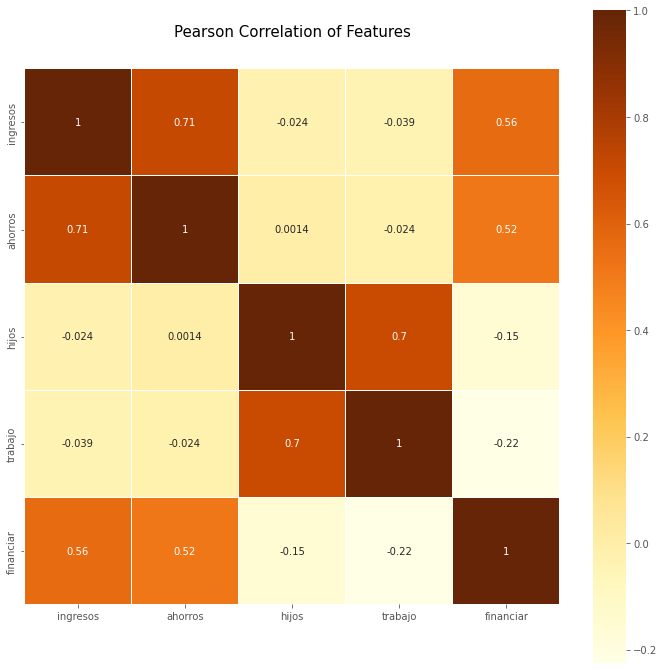

In [25]:
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

used_features =X.columns[selected]

colormap = plt.cm.YlOrBr
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(dataframe[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

**Create x_train, y_train, x_test, and y_test (train: 80% of data, test: 20% of data)**

In [27]:
# Split dataset in training and test datasets
X_train, X_test = train_test_split(dataframe, test_size=0.2, random_state=6) 
y_train =X_train["comprar"]
y_test = X_test["comprar"]

**Create and train the model, and obtain predictions from the test set**

In [29]:
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train[used_features].values,
    y_train
)
y_pred = gnb.predict(X_test[used_features])

print('Training set precision: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Test set precision: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Training set precision: 0.87
Test set precision: 0.90


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


**Make 2 predections**

1.   A family with no kids with 2,000 of salary who wants to buy a house of 2000,000 and only have 5,000 saved
2.   A family with 2 kids with a monthly salary of 6,000, 34,000 saved and want to buy a house of 320,000

In [30]:
#                 ['ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar']
print(gnb.predict([[2000,        5000,     0,       5,         200000],
                   [6000,        34000,    2,       5,         320000] ]))
#Resultado esperado 0-Alquilar, 1-Comprar casa

[0 1]


**Expected results are got, in first case system recommends to rent, and the second one to buy.**